In [16]:
#already created dataset is stored on dropbox and this code is implemented on google colab

!wget https://www.dropbox.com/sh/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a?dl=0n


--2020-12-28 23:21:19--  https://www.dropbox.com/sh/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a?dl=0n
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a [following]
--2020-12-28 23:21:19--  https://www.dropbox.com/sh/raw/slwb0e8ggqt6jzj/AABgGdMcctqVDU-ZcD5nM2K3a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb51321170acddbbcdb7376be43.dl.dropboxusercontent.com/zip_download_get/ApU0hsiDupdbpDfsT8d2_hYg9CL2gENZXbF-y_cuf0ic2mScVrGvQypbL69mOSonx_toHC5S3z3B6Bhd6rJ38QJI4D9gJM6oWxK9g2Yy_7ZZTQ [following]
--2020-12-28 23:21:20--  https://ucb51321170acddbbcdb7376be43.dl.dropboxusercontent.com/zip_download_get/ApU0hsiDupdbpDfsT8d2_hYg9CL2gENZXbF-y_cuf0ic2mScVrGvQypbL69mOSonx_toHC5S3z3B6Bhd

In [17]:
#first rename the zip file to covid-19dataset then execute this line

!unzip covid-19dataset

Archive:  covid-19dataset
mapname:  conversion of  failed
   creating: CovidDataset/
   creating: CovidDataset/Val/
   creating: CovidDataset/Train/
   creating: CovidDataset/Val/Covid/
   creating: CovidDataset/Val/Normal/
   creating: CovidDataset/Train/Covid/
   creating: CovidDataset/Train/Normal/
 extracting: CovidDataset/Train/Covid/AR-2.jpg  
 extracting: CovidDataset/Train/Covid/AR-1.jpg  
 extracting: CovidDataset/Train/Covid/paving.jpg  
 extracting: CovidDataset/Val/Covid/4-x-day1.jpg  
 extracting: CovidDataset/Val/Covid/16654_1_1.png  
 extracting: CovidDataset/Val/Covid/16654_2_1.jpg  
 extracting: CovidDataset/Val/Covid/16654_4_1.jpg  
 extracting: CovidDataset/Train/Covid/16660_2_1.jpg  
 extracting: CovidDataset/Train/Covid/gr1_lrg-b.jpg  
 extracting: CovidDataset/Train/Covid/gr1_lrg-a.jpg  
 extracting: CovidDataset/Train/Covid/16660_4_1.jpg  
 extracting: CovidDataset/Train/Covid/16660_1_1.jpg  
 extracting: CovidDataset/Train/Covid/16660_3_1.jpg  
 extracting: Covi

In [42]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Test"

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [61]:
#CNN model in Keras
#Sequential model
#layered architecture
#we are creating 3-4 CNN layers with some classification layers
#first we put a convolutional layer with 32 filers
#adding two layers increases the non-linearity and reduce the number of parameters
#as we go deeper into the network we increase the number of filters because as we go deeper the numeber of distinct patterns we see are more


model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  #single neuron
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [62]:
model.summary()
#flatten is to convert matrix into vector


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 64)       

In [63]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow

In [64]:
layer_outputs=[layer.output for layer in model.layers[1:]]

In [65]:
visualize_model= tensorflow.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [66]:
img=load_img('./CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', target_size=(224,224))

In [67]:
x=img_to_array(img)
x.shape

(224, 224, 3)

In [68]:
x=x.reshape((1,224,224,3))
print(x.shape)

(1, 224, 224, 3)


In [69]:
x=x/255

In [70]:
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

13


In [71]:
layer_names=[layer.name for layer in model.layers]
print(layer_names)

['conv2d_12', 'conv2d_13', 'max_pooling2d_9', 'dropout_12', 'conv2d_14', 'max_pooling2d_10', 'dropout_13', 'conv2d_15', 'max_pooling2d_11', 'dropout_14', 'flatten_3', 'dense_6', 'dropout_15', 'dense_7']


In [72]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

conv2d_12 (1, 220, 220, 64)
conv2d_13 (1, 110, 110, 64)
max_pooling2d_9 (1, 110, 110, 64)
dropout_12 (1, 108, 108, 64)
conv2d_14 (1, 54, 54, 64)
max_pooling2d_10 (1, 54, 54, 64)
dropout_13 (1, 52, 52, 128)
conv2d_15 (1, 26, 26, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


max_pooling2d_11 (1, 26, 26, 128)
dropout_14 (1, 86528)
flatten_3 (1, 64)
dense_6 (1, 64)
dropout_15 (1, 1)


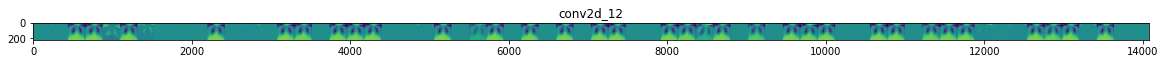

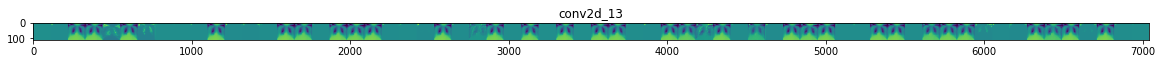

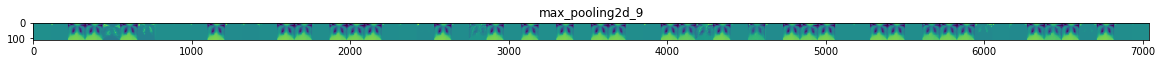

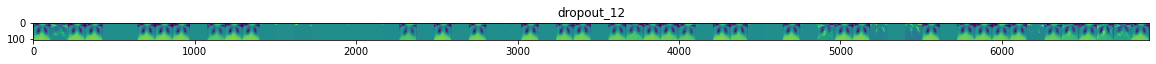

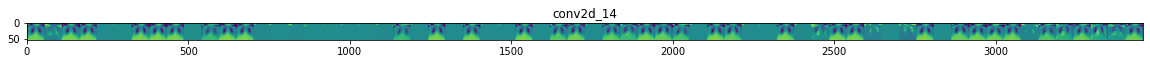

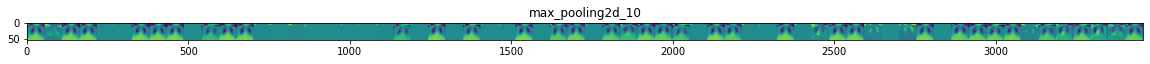

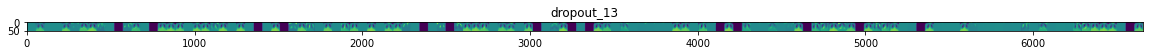

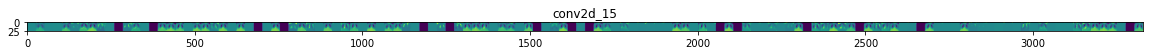

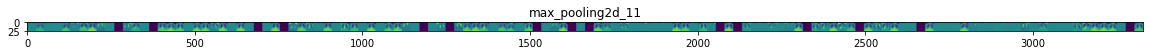

In [73]:
# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(layer_names, feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Filter visualization

In [101]:
filters = model.layers[2].get_weights()
print(filters)

[]


conv2d_12
32


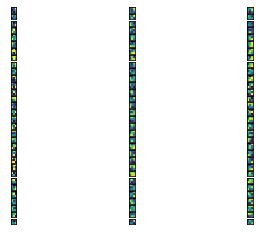

conv2d_13
64


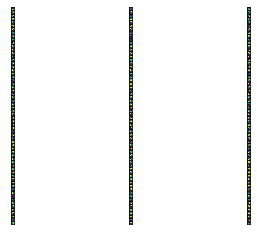

conv2d_14
64


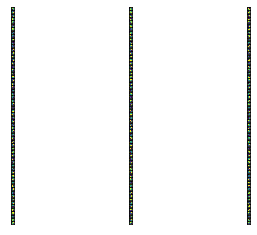

conv2d_15
128


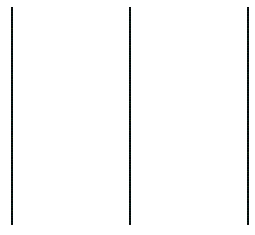

In [102]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [74]:
#trainning from scratch
#we use keras image generator library
#we can't do vertical flip as all the x-ray should have same orientation

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [75]:
#it automatically picks all the images from the directory and converts it to 224,224

train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [76]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [77]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [78]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 1.6027 - accuracy: 0.5041 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.6730 - accuracy: 0.5859 - val_loss: 0.6197 - val_accuracy: 0.9167
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.5409 - accuracy: 0.7490 - val_loss: 0.4326 - val_accuracy: 0.9167
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.4078 - accuracy: 0.7699 - val_loss: 0.3601 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.4013 - accuracy: 0.8128 - val_loss: 0.2927 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.2440 - accuracy: 0.9233 - val_loss: 0.1882 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.2981 - accuracy: 0.8946 - val_loss: 0.1927 - val_accuracy: 0.9333
Epoch 8/10
6/6 [========================

In [79]:
model.save("model.h5")

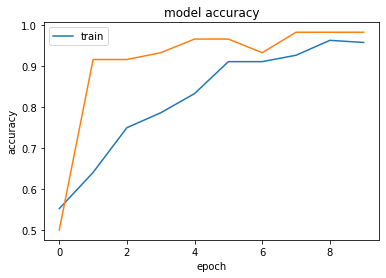

In [99]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

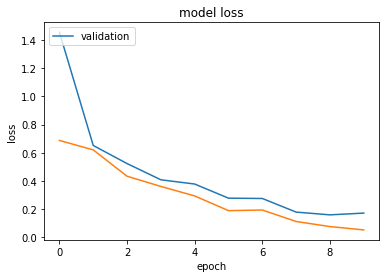

In [100]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.legend(['validation'], loc='upper left')
plt.show()

In [103]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.09508609026670456, 0.96875]

In [104]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.051325712352991104, 0.9833333492279053]

In [105]:
#test images
model=load_model("model.h5")

In [106]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [107]:
y_actual=[]

In [108]:
y_test=[]

In [109]:
import os

In [110]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [111]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [112]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
cm=confusion_matrix(y_actual,y_test)

In [115]:
import seaborn as sns

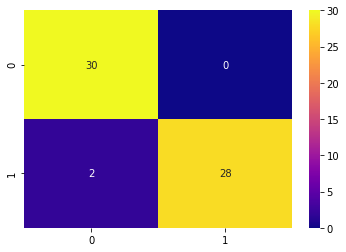

In [116]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [117]:
# 0,0 = true positive
# 0,1 = true negative
# 1,0 = false positive
# 1,1 = false negative